Decision Tree

Tiatnic Survival Dataset

In [1]:
#Import the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("train_titanic.csv")
df.head()

/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#Load the data sets- train and test 
x=df.drop(columns='Survived')
y=df['Survived']
x
y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [184]:
#Look at top values of train data 
x_train.head()
y_train.head()

35     0
46     0
453    1
291    1
748    0
Name: Survived, dtype: int64

In [185]:
#Print the column names of train data
x_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [186]:
#Print the dimension of train and test data
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(223,)

In [187]:
#Print the number of missing values in each column of train and test data
x_train.isna().sum()
y_train.isna().sum()
x_test.isna().sum()
y_test.isna().sum()

0

## Data Visualization

In [188]:
#Barchart of Survived, Pclass, Sex, Embarked
# data=df['Survived']
# count=df['Survived'].value_counts().sort_index()
# plt.bar(count,height=1)
# plt.show()

In [189]:
#Histogram of Age, Parch, Fare

In [190]:
#Plot histogram of age for survived and did not survived class

In [191]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers

In [192]:
#Histogram of Age of the given data set(sample)

## Handling Missing Values

In [4]:
#Replace the msiing values in Embarked column by 'S'
df['Embarked'].fillna('S',inplace=True)
df['Embarked'].isna().sum()
df['Fare'].isna().sum()

np.int64(0)

In [8]:
#Impute the missing values in Fare column with median value
df['Fare'].median()
df['Fare'].fillna(df['Fare'].median(),inplace=True)
df['Fare'].isnull().sum()

/tmp/ipykernel_9011/3696933308.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(),inplace=True)


np.int64(0)

In [195]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data

## Feature Engineering - Creating new features

In [196]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
df['FamilySize']=df['Parch']+df['SibSp']+1
df['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [197]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
df['IsAlone']=[True if col==1 else False for col in df['FamilySize']]
df['IsAlone']

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: IsAlone, Length: 891, dtype: bool

## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [198]:
df['Has_cabin']=[True if col=='NaN'else False for col in df['Cabin']]
df['Has_cabin']
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Has_cabin, Length: 891, dtype: bool

In [199]:
x_train=x_train.drop(columns=['PassengerId','Name','Cabin'])
x_test=x_test.drop(columns=['PassengerId','Name','Cabin'])

In [203]:
x_train
x_test=x_test.drop(columns=['PassengerId','Name','Cabin'])


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
35,1,male,42.0,1,0,113789,52.0000,S
46,3,male,NaN,1,0,370371,15.5000,Q
453,1,male,49.0,1,0,17453,89.1042,C
291,1,female,19.0,1,0,11967,91.0792,C
748,1,male,19.0,1,0,113773,53.1000,S
...,...,...,...,...,...,...,...,...
715,3,male,19.0,0,0,348124,7.6500,S
767,3,female,30.5,0,0,364850,7.7500,Q
72,2,male,21.0,0,0,S.O.C. 14879,73.5000,S
235,3,female,NaN,0,0,W./C. 6609,7.5500,S


In [201]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
862,1,female,48.0,0,0,17466,25.9292,S
223,3,male,NaN,0,0,349234,7.8958,S
84,2,female,17.0,0,0,SO/C 14885,10.5000,S
680,3,female,NaN,0,0,330935,8.1375,Q
535,2,female,7.0,0,2,F.C.C. 13529,26.2500,S
...,...,...,...,...,...,...,...,...
506,2,female,33.0,0,2,26360,26.0000,S
467,1,male,56.0,0,0,113792,26.5500,S
740,1,male,NaN,0,0,16988,30.0000,S
354,3,male,NaN,0,0,2647,7.2250,C


## Model Building

In [ ]:
#Prepare X and y


In [216]:
# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x_train['Sex']=le.fit_transform(x_train['Sex'])
x_train['Embarked']=le.fit_transform(x_train['Embarked'])
x_test['Sex']=le.fit_transform(x_test['Sex'])
x_test['Embarked']=le.fit_transform(x_test['Embarked'])

In [ ]:
# concat df_categorical with original df

In [ ]:
#Do a pairplot of all features

In [217]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
35,1,1,42.0,1,0,113789,52.0000,2
46,3,1,NaN,1,0,370371,15.5000,1
453,1,1,49.0,1,0,17453,89.1042,0
291,1,0,19.0,1,0,11967,91.0792,0
748,1,1,19.0,1,0,113773,53.1000,2
...,...,...,...,...,...,...,...,...
715,3,1,19.0,0,0,348124,7.6500,2
767,3,0,30.5,0,0,364850,7.7500,1
72,2,1,21.0,0,0,S.O.C. 14879,73.5000,2
235,3,0,NaN,0,0,W./C. 6609,7.5500,2


In [230]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
# x_train=x_train.drop(columns=['Ticket'])


In [223]:
x_test=x_test.drop(columns=['Ticket'])

In [228]:
# Create the model
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1])

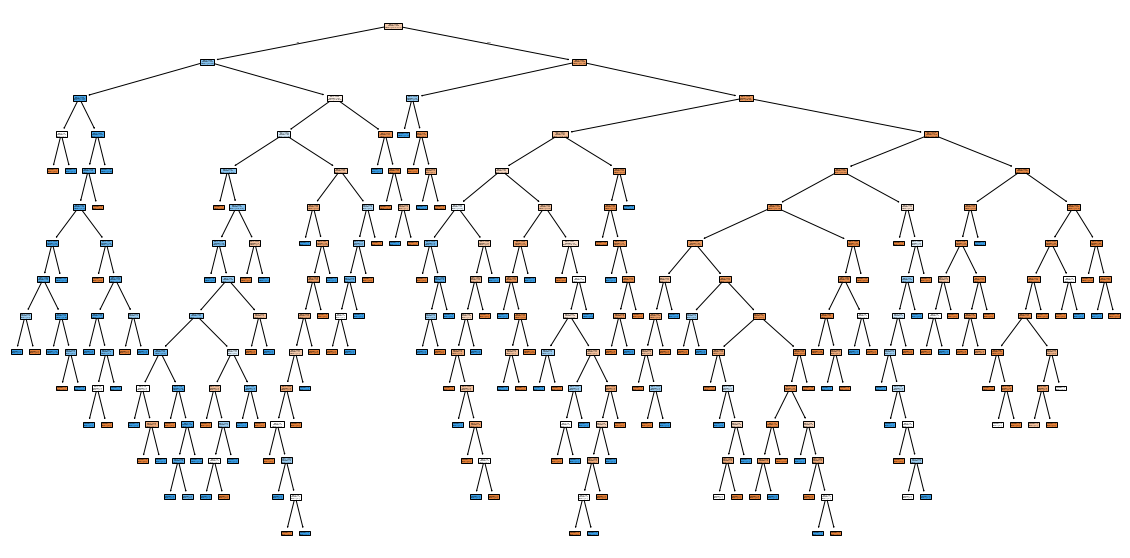

In [234]:
#Print the tree

# # Importing required packages for visualization
# from sklearn.tree import export_text

# # Print the tree in text form
# tree_rules = export_text(model, feature_names=list(x_train.columns))
# print(tree_rules)
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=x_train.columns, filled=True)
plt.show()



In [ ]:
# plotting tree with max_depth=3 

<img src="tree2.png">

In [229]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report
# 1. Import required libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 2. Make predictions on th validation set # use your trained model here

# 3. Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 4. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# 5. Precision
print("Precision:", precision_score(y_test, y_pred))

# 6. Recall
print("Recall:", recall_score(y_test, y_pred))

# 7. F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

# 8. Full Classification Report (combines the above)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[109  19]
 [ 33  62]]
Accuracy: 0.7668161434977578
Precision: 0.7654320987654321
Recall: 0.6526315789473685
F1 Score: 0.7045454545454546

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       128
           1       0.77      0.65      0.70        95

    accuracy                           0.77       223
   macro avg       0.77      0.75      0.76       223
weighted avg       0.77      0.77      0.76       223



In [ ]:
# Printing confusion matrix and accuracy